##Oil Price Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
!pip install xlrd
!pip install pandas==0.23.4 #new version of pandas needed to read the Excel file correctly

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#import excel file from local drive
from google.colab import files
uploaded = files.upload()

Saving RBRTEd.xls to RBRTEd.xls
Saving RNGWHHDd.xls to RNGWHHDd.xls
Saving RWTCd.xls to RWTCd.xls


In [ ]:
brent_p = pd.read_excel('RBRTEd.xls', sheet_name="Data 1", names=['Date', 'Europe Brent Spot Price FOB (Dollars per Barrel)'])
wti_p = pd.read_excel('RWTCd.xls', sheet_name="Data 1", names=['Date', 'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])
gas_p = pd.read_excel('RNGWHHDd.xls', sheet_name="Data 1", names=['Date', 'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'])

In [ ]:
#features
print(brent_p.shape)
print(wti_p.shape)
print(gas_p.shape)

(8828, 2)
(9109, 2)
(6324, 2)


It seems as though the gas price DataFrame contains 6324 days' worth of information. We would like to compare prices over the same period. Therefore, I will drop the first rows of the bigger DataFrames to compare each dataset on the same time frame.

Let's double check the first rows of each DataFrame to see the start date. 

In [ ]:
print(brent_p.head())
print(wti_p.head())
print(gas_p.head())

                  Date  Europe Brent Spot Price FOB (Dollars per Barrel)
0            Sourcekey                                             RBRTE
1                 Date  Europe Brent Spot Price FOB (Dollars per Barrel)
2  1987-05-20 00:00:00                                             18.63
3  1987-05-21 00:00:00                                             18.45
4  1987-05-22 00:00:00                                             18.55
                  Date Cushing, OK WTI Spot Price FOB (Dollars per Barrel)
0            Sourcekey                                               RWTC 
1                 Date  Cushing, OK WTI Spot Price FOB (Dollars per Ba... 
2  1986-01-02 00:00:00                                              25.56 
3  1986-01-03 00:00:00                                                 26 
4  1986-01-06 00:00:00                                              26.53 
                  Date Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
0            Sourcekey        

Let's remove all values in the 'Date' column of the dataframes, which contain years between 1986 and 1997 (exclusive).

Before doing so, let's remove the first two rows of all DataFrames as it cointains two string type objects. The function, which will delete the first x number of appropriate datetime objects will return an error for a string. Let's also remove the last row of the gas_p DataFrame.

In [ ]:
gas_p1 = gas_p.drop(6323) #drop last row #6323
#drop first 2 rows of every DataFrame
gas_p1 = gas_p.iloc[2:]
brent_p1 = brent_p.iloc[2:]
wti_p1 = wti_p.iloc[2:]
#Do not run this code multiple time as it will keep removing the first 2 rows of each newly created DataFrame

In [ ]:
gas_p1 = gas_p1.drop(6323)
print(gas_p1)

In [ ]:
from_ts = pd.to_datetime('1986-01-02 00:00:00') #convert String to datetime type object to compare it with those in the DataFrame gas_p, etc.
until_ts = pd.to_datetime('1997-01-07 00:00:00')
brent_price = brent_p1[(brent_p1.Date > until_ts)]
wti_price = wti_p1[(wti_p1.Date > until_ts)]
gas_price = gas_p1[(gas_p1.Date > until_ts)]

After dropping the first few thousand rows for the Brent and WTI oil DataFrames, the index should be reset so that the first dates are set at the index zero. Using the reset_index()

In [ ]:
brent_price.reset_index(drop=True, inplace=True)
print(brent_price.head())
wti_price.reset_index(drop=True, inplace=True)
print(wti_price.head())
gas_price.reset_index(drop=True, inplace=True)
print(gas_price.head())

                  Date Europe Brent Spot Price FOB (Dollars per Barrel)
0  1997-01-08 00:00:00                                            24.78
1  1997-01-09 00:00:00                                            24.83
2  1997-01-10 00:00:00                                            24.22
3  1997-01-13 00:00:00                                            23.41
4  1997-01-15 00:00:00                                            23.31
                  Date Cushing, OK WTI Spot Price FOB (Dollars per Barrel)
0  1997-01-08 00:00:00                                              26.55 
1  1997-01-09 00:00:00                                               26.3 
2  1997-01-10 00:00:00                                              26.15 
3  1997-01-13 00:00:00                                               25.2 
4  1997-01-14 00:00:00                                               25.1 
                  Date Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
0  1997-01-08 00:00:00              

In [ ]:
print(gas_price.shape)
print(brent_price.shape)
print(wti_price.shape)
#replace columns names 
brent_price = brent_price.rename(columns={'Europe Brent Spot Price FOB (Dollars per Barrel)': 'Brent Spot Price'})
wti_price = wti_price.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)':'WTI Spot Price'})
gas_price = gas_price.rename(columns={'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)':'Gas Spot Price'})

print(brent_price.tail())
print(wti_price.tail())
print(gas_price.tail())

(6320, 2)
(6372, 2)
(6307, 2)
                     Date Brent Spot Price
6367  2022-02-16 00:00:00            97.44
6368  2022-02-17 00:00:00            95.28
6369  2022-02-18 00:00:00            96.18
6370  2022-02-21 00:00:00            98.95
6371  2022-02-22 00:00:00            98.73
                     Date WTI Spot Price
6302  2022-02-15 00:00:00          92.07
6303  2022-02-16 00:00:00          93.83
6304  2022-02-17 00:00:00          91.78
6305  2022-02-18 00:00:00          91.26
6306  2022-02-22 00:00:00          92.11
                     Date Gas Spot Price
6315  2022-02-15 00:00:00           4.31
6316  2022-02-16 00:00:00           4.39
6317  2022-02-17 00:00:00           4.57
6318  2022-02-18 00:00:00           4.61
6319  2022-02-22 00:00:00           4.48


In [ ]:
print(wti_price.tail())

                     Date WTI Spot Price
6302  2022-02-15 00:00:00          92.07
6303  2022-02-16 00:00:00          93.83
6304  2022-02-17 00:00:00          91.78
6305  2022-02-18 00:00:00          91.26
6306  2022-02-22 00:00:00          92.11


Because of the difference in shape we obtain, let's investigate if there are any null values present in the price of the DataFrames:

In [ ]:
brent_price.isna().sum()

Date                0
Brent Spot Price    0
dtype: int64

In [ ]:
gas_price.isna().sum()

Date              0
Gas Spot Price    1
dtype: int64

In [ ]:
wti_price.isna().sum()

Date              0
WTI Spot Price    0
dtype: int64

1 null data is found in the gas_price DataFrame, let's find its location and replace it by using values from neighbouring rows. This is using the fillna() method.

In [ ]:
print(gas_price[gas_price['Gas Spot Price'].isna()])

                     Date Gas Spot Price
5283  2018-01-05 00:00:00            NaN


In [ ]:
gas_price.fillna(method = 'ffill', inplace=True)

Check the null value has been replaced correctly by a neighbouring value.

In [ ]:
print(gas_price.iloc[5280:5290])

           Date  Gas Spot Price
5280 2018-01-02            6.24
5281 2018-01-03            6.24
5282 2018-01-04            4.65
5283 2018-01-05            4.65
5284 2018-01-08            2.89
5285 2018-01-09            2.93
5286 2018-01-10            3.16
5287 2018-01-11            3.16
5288 2018-01-12            4.06
5289 2018-01-16            5.46


I could also check whether any of the columns in each DataFrame contain letters or symbols, such as punctuation characters.

In [ ]:
import string
alphabet = string.ascii_letters+string.punctuation
#check if the 'Price' column contains any of these characters
#'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

a = brent_price['Brent Spot Price'].str.strip(alphabet).astype(bool).any()
a

True

I am unsure about part above...

##Adjusting data for inflation

Finally, before moving on to plotting and other visualisation techniques, I thought it would be beneficial to adjust the oil and gas prices with inflation. Indeedn, nominal prices can be deceiving, and indeed historical data can be very misleading. Adjusting for inflation can get us radically different looking charts. However, it can also be said that inflation has not been very high since the end of the 1990's in the USA, I still think this could be a worthwhile exercises for the purpose of learning data handling with Python.

Some variant of CPI is what one would typically to adjust for inflation, as the source for Brent, WTI and gas spot prices are from the United States. 

Let's load the inflation data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CPIAUCNS.csv to CPIAUCNS.csv


In [ ]:
inflation = pd.read_csv("CPIAUCNS.csv")

In [ ]:
print(inflation.tail())

           DATE  CPIAUCNS
296  2021-09-01   274.310
297  2021-10-01   276.589
298  2021-11-01   277.948
299  2021-12-01   278.802
300  2022-01-01   281.148


I will be using the last data value of the CPI data to create the index multiplier. The commodities prices will be indexed to today's prices. Also note that the CPI data is monthly, but the three DataFrames give daily prices. I will therefore repeat each CPI datapoint for the entire month.

In [ ]:
#create the multiplier index
inflation['CPI_Multiplier'] = inflation['CPIAUCNS'].iloc[-1] / inflation['CPIAUCNS'] #last CPI divided by every CPI datapoint

In [ ]:
inflation.tail()

,DATE,CPIAUCNS,CPI_Multiplier
296,2021-09-01,274.310,1.024928
297,2021-10-01,276.589,1.016483
298,2021-11-01,277.948,1.011513
299,2021-12-01,278.802,1.008415
300,2022-01-01,281.148,1.000000


Now, it is import to handle dates in the CPI data set, 'inflation'. Indeed, the CPI data is given in months as opposed to days for Brent, WTI and Gas spot prices.

In [ ]:
#check type of the DATE column of CPI data file
print(type(inflation.iloc[0,0]))
#check type of the DATE column of brent, wti or gas price
print(type(wti_price.iloc[0,0]))
print(gas_price.shape)

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(6320, 2)


Each date given in the CPI data (inflation) is a string. The dates in the prices DataFrames are already in the right format. These strings are in the format 'YYYY/MM/DD', which needs to be converted into a Pandas datetime format. 

In [ ]:
#change the type of objects contained in the DATE column of inflation
inflation.DATE = pd.to_datetime(inflation.DATE)
print(type(inflation.iloc[0,0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


If the date on 'brent_price' file corresponds to the month represented by the DATE column in 'inflation' file, then multiply the corresponding CPI figure by every oil/gas price in that same month of the same year.

In [ ]:
for i in range(len( brent_price.index)):
  for j in range(len(inflation.index)):
    if (brent_price.iloc[i,0].month == inflation.iloc[j,0].month and brent_price.iloc[i,0].year == inflation.iloc[j,0].year ):
      brent_price.iloc[i,2] = brent_price.iloc[i,1] * inflation.iloc[j,2]

In [ ]:
#check the rows match each other
print(brent_price['Brent Spot Price'], brent_price['Adjusted Brent Spot Price'])

Because the CPI data is not yet available for the month of February, the data output in 'Adjusted Brent Spot Price' is dropped for ease.

In [ ]:
from_ts = pd.to_datetime('2022-02-01 00:00:00') #drop data points in all DataFrames after Feb 22 (including not yet adjusted WTI + Gas Spot Prices)
brent_price = brent_price[(brent_price.Date < from_ts)]
wti_price = wti_price[(wti_price.Date < from_ts)]
gas_price = gas_price[(gas_price.Date < from_ts)]

Repeat the adjustment for inflation for WTI Spot Prices

In [ ]:
#create empty column in wti_price
wti_price['Adjusted WTI Spot Price'] = ""

In [ ]:
for i in range(len(wti_price.index)):
  for j in range(len(inflation.index)):
    if (wti_price.iloc[i,0].month == inflation.iloc[j,0].month and wti_price.iloc[i,0].year == inflation.iloc[j,0].year ):
      wti_price.iloc[i,2] = wti_price.iloc[i,1] * inflation.iloc[j,2]

Repeat the adjustment for inflation for Gas Spot Prices

In [ ]:
#create empty column in gas_price
gas_price['Adjusted Gas Spot Price'] = ""

In [ ]:
for i in range(len(gas_price.index)):
  for j in range(len(inflation.index)):
    if (gas_price.iloc[i,0].month == inflation.iloc[j,0].month and gas_price.iloc[i,0].year == inflation.iloc[j,0].year ):
      gas_price.iloc[i,2] = gas_price.iloc[i,1] * inflation.iloc[j,2]

Let's now check whether the data is correctly calculated...

The latest price point should be equal to each other in the Adjusted-to-inflation and Non-adjusted cases.

In addition, the first price points should be related by a multiplier of the first CPI_Multiplier in the 'inflation' DataFrame.

In [ ]:
#are adjusted vs. non-adjusted prices the same on the last day
print(brent_price.iloc[-1,2] == brent_price.iloc[-1,1])
print(wti_price.iloc[-1,2] == wti_price.iloc[-1,1])
print(gas_price.iloc[-1,2] == gas_price.iloc[-1,1])

True
True
True


##Plot:

We will now plot oil/gas prices both Adjusted vs. Non-Adjusted for inflation

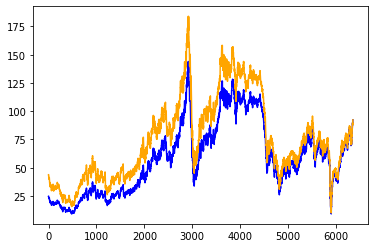

In [ ]:
plt.plot(brent_price['Brent Spot Price'], color='blue')
plt.plot(brent_price['Adjusted Brent Spot Price'], color='orange')

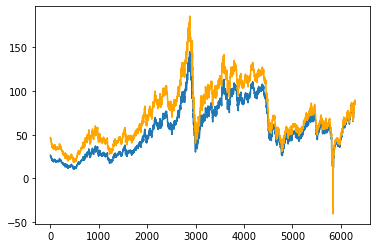

In [ ]:
plt.plot(wti_price['WTI Spot Price'])
plt.plot(wti_price['Adjusted WTI Spot Price'], color='orange')

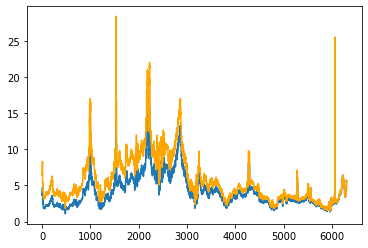

In [ ]:
plt.plot(gas_price['Gas Spot Price'])
plt.plot(gas_price['Adjusted Gas Spot Price'], color='orange')

##Histogram:

The Histogram shows a certain price on the x-axis and a corresponding, ordered list of frequencies.

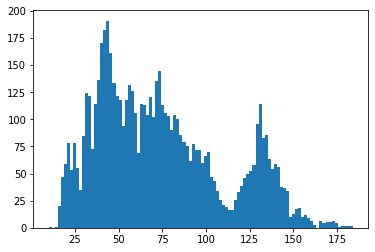

In [ ]:
hist(brent_price['Adjusted Brent Spot Price'], bins=100); #where bins defines the number of equal-width bins in the range

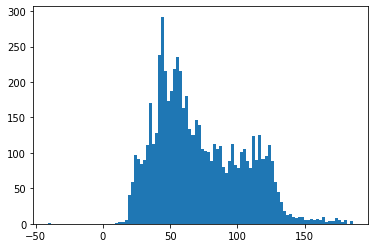

In [ ]:
hist(wti_price['Adjusted WTI Spot Price'], bins=100);

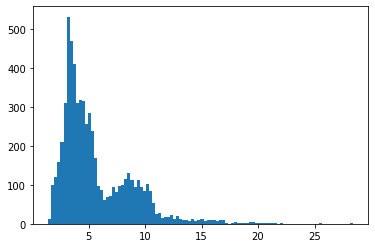

In [ ]:
hist(gas_price['Adjusted Gas Spot Price'], bins=100);

The negative value on the WTI's price histogram represents the negative price as a result of the flash crash caused by COVID supply & storage issues in 2020.

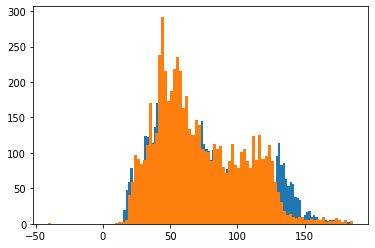

In [ ]:
#plot Brent and WTI oil prices on the same histogram in different colours to compare them.
hist(brent_price['Adjusted Brent Spot Price'], bins=100); hist(wti_price['Adjusted WTI Spot Price'], bins=100);

Let's now create histograms representing the Daily Percentage Changes (Brent, WTI, gas prices)

Because there is a small number of extreme daily percent changes, the x axis is overextended for the purpose of our visualisation methods. This can be seen below on the Brent Oil histogram. Therefore, I will crop the histograms to show more relevant information in greater detail.

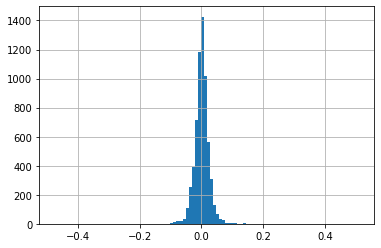

In [ ]:
perc_brent = brent_price['Adjusted Brent Spot Price'].pct_change()
perc_brent.hist(bins=100)

#perc_brent = brent_price['Brent Spot Price'].pct_change()
#hist(perc_brent, bins=100); but this does not produce the same vertical and ho

It is now easy to see where the inspiration for the Dubai Burj Khalifa Tower's design came from..!

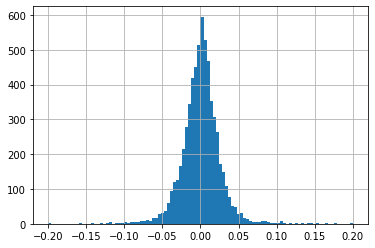

In [ ]:
perc_wti = wti_price['Adjusted WTI Spot Price'].pct_change()
perc_wti.hist(bins=100)

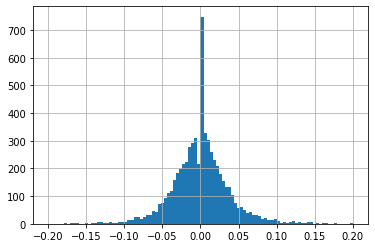

In [ ]:
perc_gas = gas_price['Adjusted Gas Spot Price'].pct_change()
perc_gas.hist(bins=100)

We can zoom into the histogram in order to see the daily + or - 5% changes in Brent, WTI or gas prices

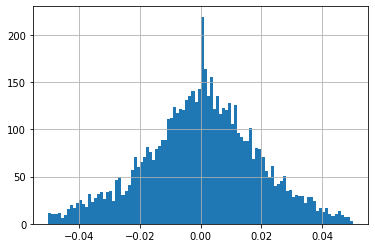

In [ ]:
perc_brent.hist(bins=100, range=(-0.05, 0.05))

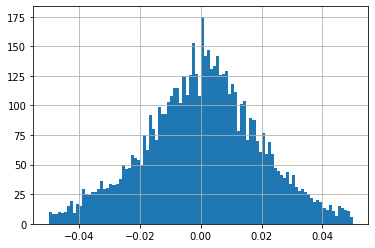

In [ ]:
perc_wti.hist(bins=100, range=(-0.05, 0.05))

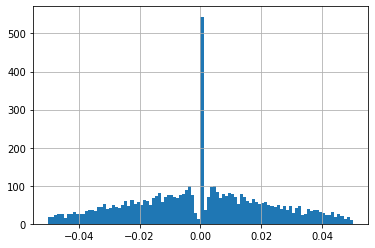

In [ ]:
perc_gas.hist(bins=100, range=(-0.05, 0.05))

##Probabilites of extreme changes in oil/gas prices